<a href="https://colab.research.google.com/github/MarcoLibertini/UPSO/blob/main/Clasificador_zonas_seg%C3%BAn_el_peligro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CLASIFICADOR DE ZONAS DE PELIGRO
`

# `Importacion de Librerias`


In [19]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import plotly.express as px

In [3]:
df = pd.read_csv('/content/drive/MyDrive/UPSO ML BD/Crimenes.csv')


In [4]:
df

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


# `Procesamiento de datos`

Ver si hay nulos.

In [5]:
# valores faltantes
print('Valores Nulos')
print(df.isnull().sum())


Valores Nulos
Estado              0
Asesinatos          0
Asaltos             0
Poblacion Urbana    0
Violaciones         0
dtype: int64


# `Escalado (No se utilizara) porque dio mejores resultados con la Normalizacion`

In [ ]:
# valores faltantes
#print('Valores Nulos')
#print(df.isnull().sum())


#scaler = StandardScaler()
#df_escalado = scaler.fit_transform(df[['Asesinatos', 'Asaltos', 'Poblacion Urbana', 'Violaciones']])

# Crear un nuevo DataFrame con variables escaladas
#df_escalado = pd.DataFrame(df_escalado, columns=['Asesinatos', 'Asaltos', 'Población Urbana', 'Violaciones'])



#sns.pairplot(df_escalado)
#plt.show()


# `Normalizacion de los datos numericos`

In [6]:
from sklearn.preprocessing import MinMaxScaler

# Seleccionar las características que deseas normalizar
aNormalizar = ['Asesinatos', 'Asaltos', 'Poblacion Urbana', 'Violaciones']
X = df[aNormalizar]

# Inicializar el MinMaxScaler
scaler = MinMaxScaler()

# Normalizar las características
dfNormalizado = scaler.fit_transform(X)

# Reemplazar las columnas originales con las normalizadas en el DataFrame
df[aNormalizar] = dfNormalizado

In [7]:
dfNormalizado

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512],
       [0.42771084, 0.54452055, 0.77966102, 0.81136951],
       [0.15060241, 0.22260274, 0.76271186, 0.09819121],
       [0.30722892, 0.6609589 , 0.6779661 , 0.21963824],
       [0.87951807, 0.99315068, 0.81355932, 0.63565891],
       [1.        , 0.56849315, 0.47457627, 0.47803618],
       [0.27108434, 0.00342466, 0.86440678, 0.33333333],
       [0.10843373, 0.25684932, 0.37288136, 0.17829457],
       [0.57831325, 0.69863014, 0.86440678, 0.43152455],
       [0.38554217, 0.23287671, 0.55932203, 0.35400517],
       [0.08433735, 0.03767123, 0.42372881, 0.10335917],
       [0.31325301, 0.23972603, 0.57627119, 0.27648579],
       [0.53614458, 0.21917808, 0.33898305, 0.23255814],
       [0.87951807, 0.69863014,

# `Curva del CODO para determinar Cluster apropiado`

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

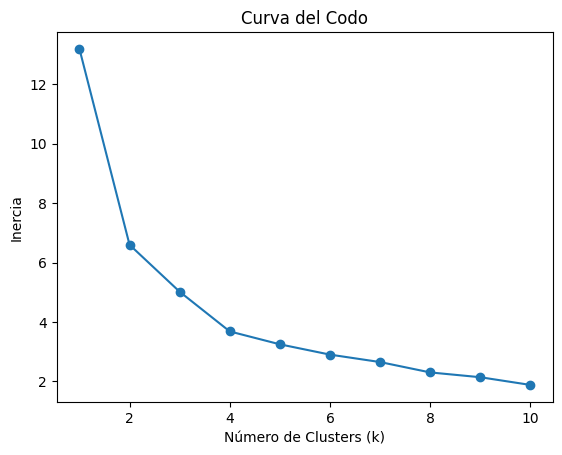

In [8]:
inercias = []


X = dfNormalizado

# Probamos con un rango de valores de k, por ejemplo, de 1 a 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inercias.append(kmeans.inertia_)

# Graficamos la curva del codo
plt.plot(range(1, 11), inercias, marker='o')
plt.title('Curva del Codo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.show()

# `Clustering con Kmeans (Creacion del Modelo)`
**Agruparemos en dos CLusters = Baja peligrosidad y Alta peligrosidad**




In [9]:
from sklearn.cluster import KMeans

# Utilizamos 2 clusters
kmeans = KMeans(n_clusters=2, n_init=20, random_state=42)
kmeans.fit(dfNormalizado)

# Obtener los centroides finales y las etiquetas de cluster
centroides_finales = kmeans.cluster_centers_

#Agregamos las predicciones en una nueva columna del df original
df['Peligrosidad'] = kmeans.fit_predict(dfNormalizado)


# La inercia de la mejor solución
inercia_mejor_solucion = kmeans.inertia_


In [ ]:
df

# `Cambiamos los valores de la columna Peligrosidad por etiquetas mas intuitivas`

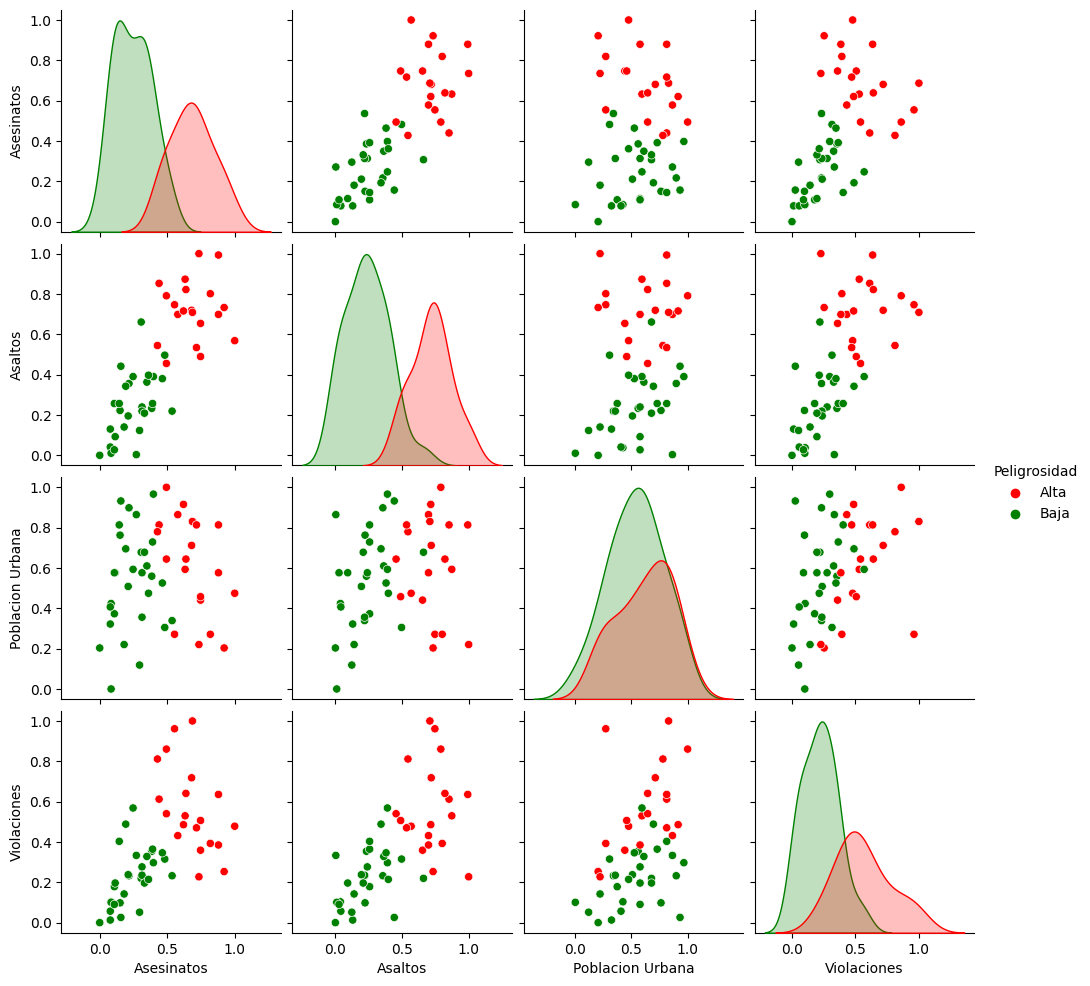

In [10]:
#Convertimos en int los valores de la columna de los clusters
df['Peligrosidad'] = df['Peligrosidad'].astype(int)

# Asignar nombres a los clusters
df['Peligrosidad'] = df['Peligrosidad'].map({0: 'Baja', 1: 'Alta'})


# Visualizar los clusters con etiquetas de peligrosidad
sns.pairplot(df, hue='Peligrosidad', palette={'Baja': 'green', 'Alta': 'red'})
plt.show()


# `Estados y sus peligrosidades`

In [11]:
# Estados de baja peligrosidad
zonasPeligroBajo = df[df['Peligrosidad'] == 'Baja']
print("Estados de Baja Peligrosidad:")
print(zonasPeligroBajo[['Estado', 'Peligrosidad']])

# Eestados de alta peligrosidad
zonasPeligroAlto = df[df['Peligrosidad'] == 'Alta']
print("\nEstados de Alta Peligrosidad:")
print(zonasPeligroAlto[['Estado', 'Peligrosidad']])

Estados de Baja Peligrosidad:
           Estado Peligrosidad
3        Arkansas         Baja
6     Connecticut         Baja
7        Delaware         Baja
10         Hawaii         Baja
11          Idaho         Baja
13        Indiana         Baja
14           Iowa         Baja
15         Kansas         Baja
16       Kentucky         Baja
18          Maine         Baja
20  Massachusetts         Baja
22      Minnesota         Baja
25        Montana         Baja
26       Nebraska         Baja
28  New Hampshire         Baja
29     New Jersey         Baja
33   North Dakota         Baja
34           Ohio         Baja
35       Oklahoma         Baja
36         Oregon         Baja
37   Pennsylvania         Baja
38   Rhode Island         Baja
40   South Dakota         Baja
43           Utah         Baja
44        Vermont         Baja
45       Virginia         Baja
46     Washington         Baja
47  West Virginia         Baja
48      Wisconsin         Baja
49        Wyoming         Baja

Estados 

# `Cantidad de estados Por Peligrosidad`

Cantidad de estados por peligrosidad:
Baja    30
Alta    20
Name: Peligrosidad, dtype: int64


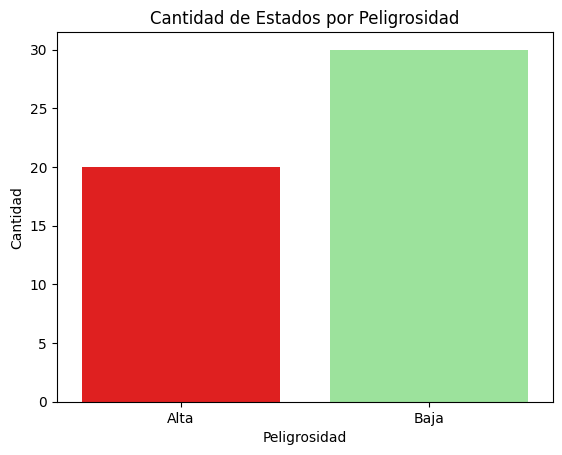

In [12]:
conteo_peligrosidad = df['Peligrosidad'].value_counts()
print("Cantidad de estados por peligrosidad:")
print(conteo_peligrosidad)


# Graficar la cantidad de cada peligrosidad
ax = sns.countplot(x='Peligrosidad', data=df, palette={'Baja': 'lightgreen', 'Alta': 'red'})
plt.title('Cantidad de Estados por Peligrosidad')
plt.ylabel('Cantidad')



plt.show()

# `Valores de evaluacion`

In [13]:
from sklearn.metrics import silhouette_score

X = dfNormalizado
# Inercia
inertia = kmeans.inertia_
print(f'Inercia: {inertia}')

# Coeficiente de silueta
silhouette_avg = silhouette_score(X, df['Peligrosidad'])
print(f'Coeficiente de Silueta: {silhouette_avg}')

Inercia: 6.596893867946196
Coeficiente de Silueta: 0.42364457559625074


# `Visualizacion en 2d de Asesinatos y Asaltos`

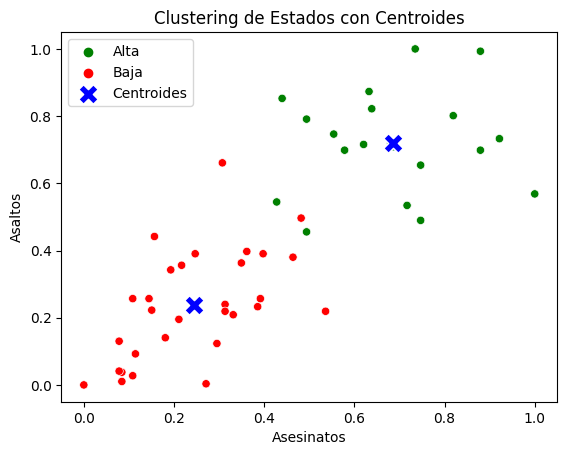

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de dispersión de los datos
sns.scatterplot(x='Asesinatos', y='Asaltos', hue='Peligrosidad', data=df, palette=['green', 'red'])

# Marcar los centroides
centroids = kmeans.cluster_centers_
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], marker='X', s=200, color='blue', label='Centroides')

plt.title('Clustering de Estados con Centroides')
plt.legend()
plt.show()

# `Observando las 3 peligrosidades en 3d`

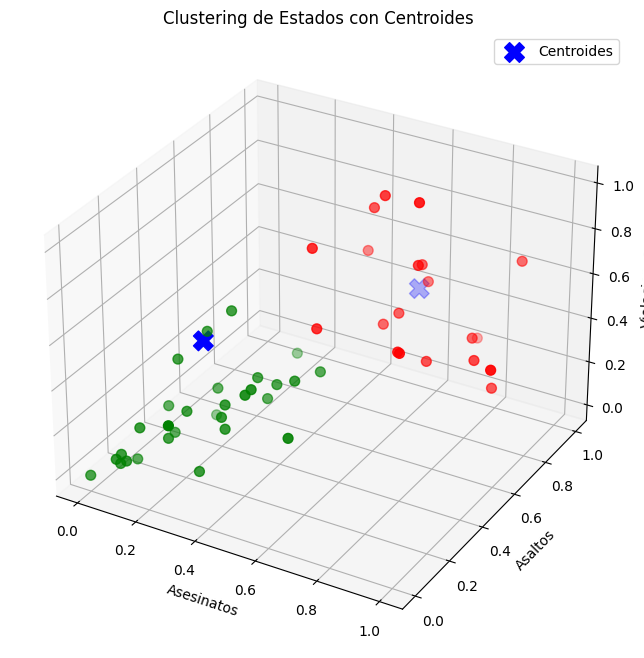

In [20]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Asesinatos'], df['Asaltos'], df['Violaciones'], c=df['Peligrosidad'].map({'Baja': 'green', 'Alta': 'red'}), s=50)
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='X', s=200, color='blue', label='Centroides')

ax.set_xlabel('Asesinatos')
ax.set_ylabel('Asaltos')
ax.set_zlabel('Violaciones')
ax.set_title('Clustering de Estados con Centroides')

plt.legend()
plt.show()


# `Visualizacion Interactiva en 3D`

In [21]:
import plotly.graph_objects as go

# Crear el gráfico tridimensional interactivo
fig = px.scatter_3d(df, x='Asesinatos', y='Asaltos', z='Violaciones', color='Peligrosidad',
                    symbol='Peligrosidad', opacity=0.7, size_max=10)

# Marcar los centroides
centroid_df = pd.DataFrame(centroids[:, :3], columns=['Asesinatos', 'Asaltos', 'Violaciones'])
fig.add_scatter3d(x=centroid_df['Asesinatos'], y=centroid_df['Asaltos'], z=centroid_df['Violaciones'],
                  mode='markers', marker=dict(size=10, color='blue', line=dict(color='black', width=2)),
                  name='Centroides')

# Mostrar el gráfico
fig.show()


# `Demostracion de la peligrosidad de los estados MEDIANTE GEOPANDAS`
`**Límites geoespaciales de los estados de EE. UU. desde Natural Earth usando GeoPandas**`

HACER CLICK EN PLOT PARA VER CON ZOOM

<ipython-input-23-25186939a688>:23: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




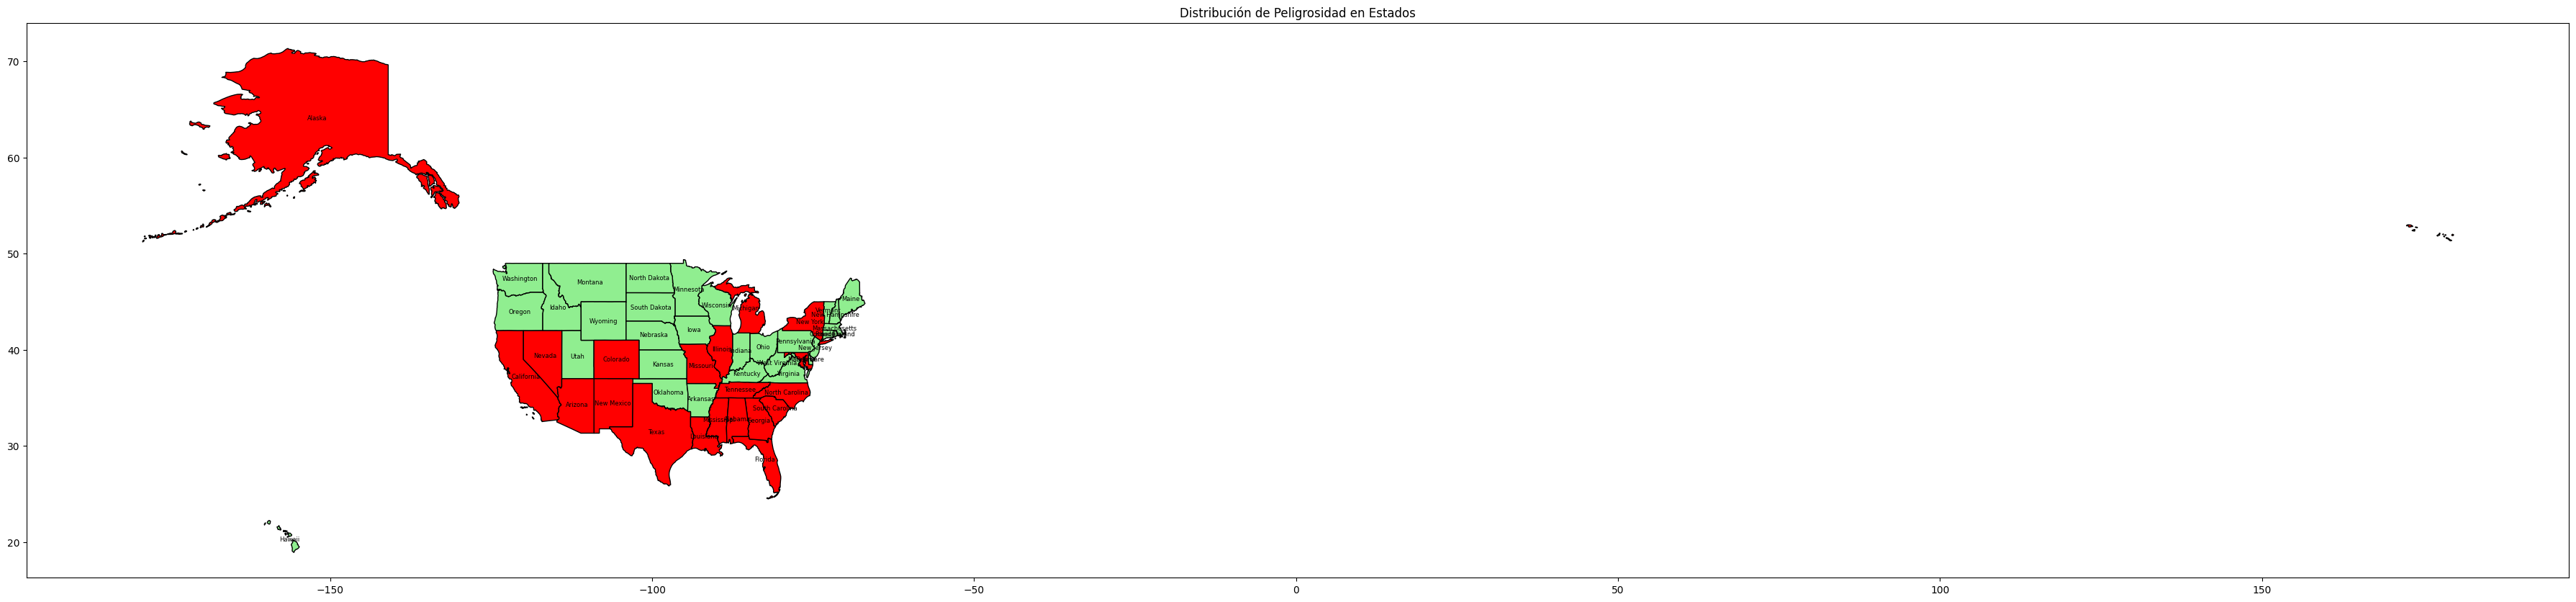

In [23]:
import geopandas as gpd

# URL de descarga de límites estatales de Estados Unidos desde Natural Earth
url = "https://www2.census.gov/geo/tiger/GENZ2020/shp/cb_2020_us_state_20m.zip"

# Cargar el GeoDataFrame desde el archivo zip
gdf = gpd.read_file(url)


# MERGEAMOS LOS NOMBRES DE ESTADOS DEL GEO CON EL NUESTRO
gdf_merged = gdf.merge(df, how='inner', left_on='NAME', right_on='Estado')


fig, ax = plt.subplots(figsize=(60, 10))

# Plot de estados con baja peligrosidad
gdf_merged[gdf_merged['Peligrosidad'] == 'Baja'].plot(ax=ax, color='lightgreen', edgecolor='black', label='Baja Peligrosidad')

# Plot de estados con alta peligrosidad
gdf_merged[gdf_merged['Peligrosidad'] == 'Alta'].plot(ax=ax, color='red', edgecolor='black', label='Alta Peligrosidad')

# Etiquetas para cada estado
for x, y, label in zip(gdf_merged.geometry.centroid.x, gdf_merged.geometry.centroid.y, gdf_merged['Estado']):
    ax.text(x, y, label, fontsize=6, ha='center', va='center')


ax.set_title('Distribución de Peligrosidad en Estados')

plt.show()